In [1]:
]activate calculations 

  Activating project at `~/spinGlasses/calculations`


# Setup

In [12]:
using calculations
using Plots; gr()

using LaTeXStrings
using Statistics
using ColorSchemes

function norm(arr)
    arrNorm = sum(abs.(arr))
    arrNorm
end;

function coinflip()
    return 2*(rand()>0.5) - 1
end


coinflip (generic function with 1 method)

In [3]:
calculations.nPoints = 19;
calculations.nBonds = 19;
calculations.sigma = 1;

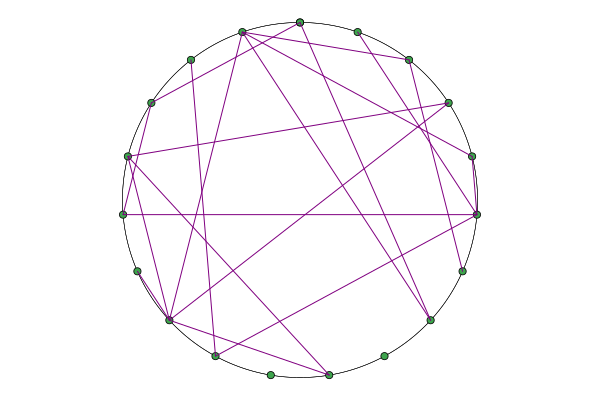

In [4]:
plot!(size=(750, 750))

connectionsSet = calculations.generateConnectionSet();
connectionPlot = calculations.bigPlotFunction(connectionsSet); 

plot!(connectionPlot)

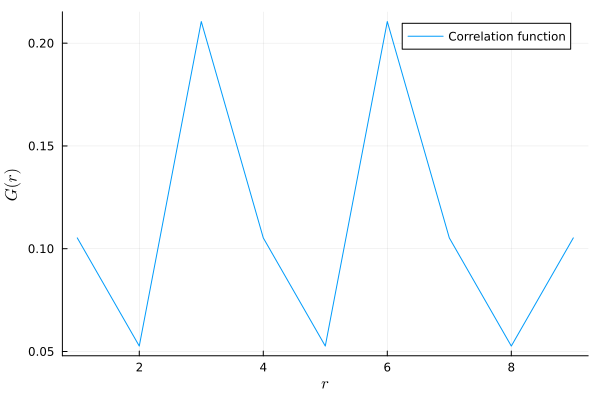

In [5]:
plot(calculations.correlationFunction(connectionsSet), label="Correlation function")
plot!(xlabel=L"r", ylabel=L"$G(r)$")

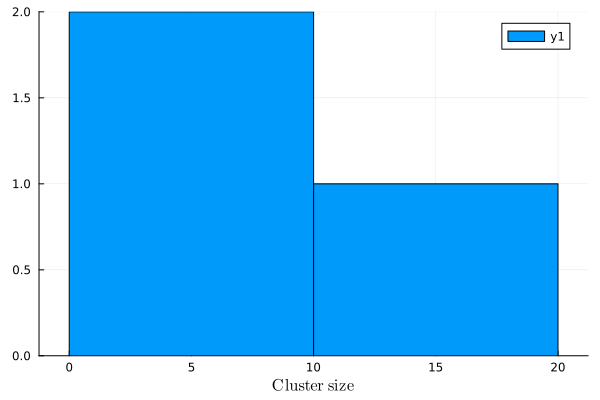

In [6]:
connectionArray = calculations.connectionSetToConnectivityArrayConversion(connectionsSet);
clusters = calculations.clusterIdentification(connectionArray);
clusterSizes = [];
for cluster in clusters
    push!(clusterSizes, length(cluster))
end

histogram(clusterSizes, xlabel=L"\textrm{Cluster\ size}")

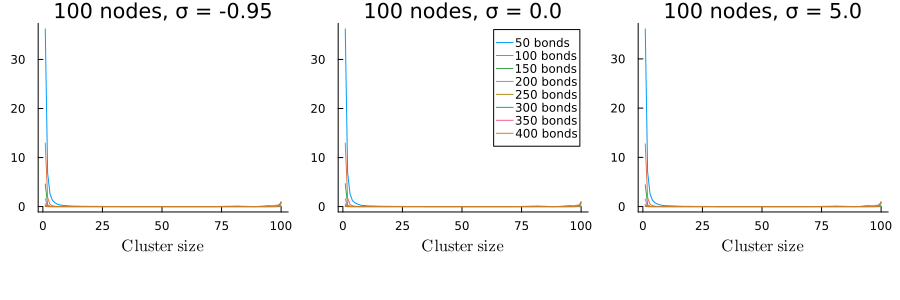

In [7]:

calculations.nPoints = 100
nBondsArray = 50:50:400
sigmaArray = [-0.95, 0, 5]

clusterSizes = range(1, 1, length=nPoints)

plt = plot(layout = (1, length(sigmaArray)), size=(900, 300), bottom_margin=15Plots.mm, legend=false, grid=false)# , ylims=(0,0.5))

for (index, sigma) in enumerate(sigmaArray)
    calculations.sigma = sigma
    
    
    meanNClusters = []
    varNClusters = []
    

    plot!(title="$(calculations.nPoints) nodes, σ = $(calculations.sigma)", sp=index)
    
    for nbonds in nBondsArray
        calculations.nBonds = nbonds
        y = calculations.clusterSizeStatistics(1000)
        yNorm = norm(y[1])

        plot!(
            y[1].*clusterSizes,
            ribbon=y[2]/2 .* clusterSizes,
            label="$(calculations.nBonds) bonds", sp=index, legend=(index==2))

        plot!(legendcols=length(nBondsArray))


    end

plot!(xlabel=L"\textrm{Cluster\ size}", sp=index)

end

plot!()

# savefig("figures/clusterSizeDistribution.pdf")



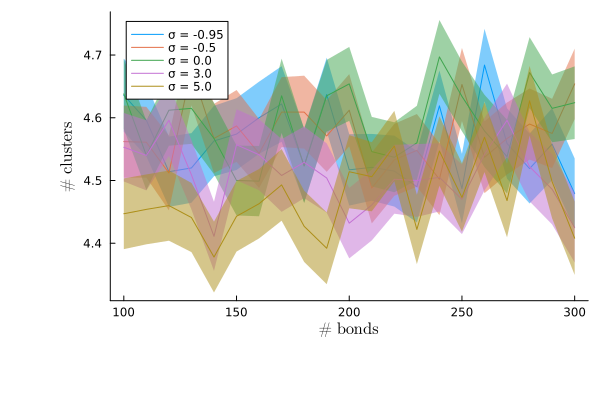

In [8]:

calculations.nPoints = 200
plt = plot( left_margin=15Plots.mm,bottom_margin=15Plots.mm, legend=false, grid=false)

nBondsArray = 100:10:300
sigmaArray = [-0.95, -0.5, 0, 3, 5]

for (index, sigma) in enumerate(sigmaArray)
        
    meanNClusters = []
    varNClusters = []
    
    calculations.sigma = sigma
    
    for nBonds in nBondsArray
        nClusters = calculations.clusterCountStatistics(1000)
        append!(meanNClusters, nClusters[1])
        append!(varNClusters, nClusters[2])
    end
    plot!(nBondsArray, meanNClusters, ribbon=varNClusters, label="σ = $(calculations.sigma)")
end

plot!(xlabel=L"\textrm{\#\ bonds}", ylabel=L"\textrm{\#\ clusters}",legend=true)


savefig("figures/nClusters.pdf")
plot!()

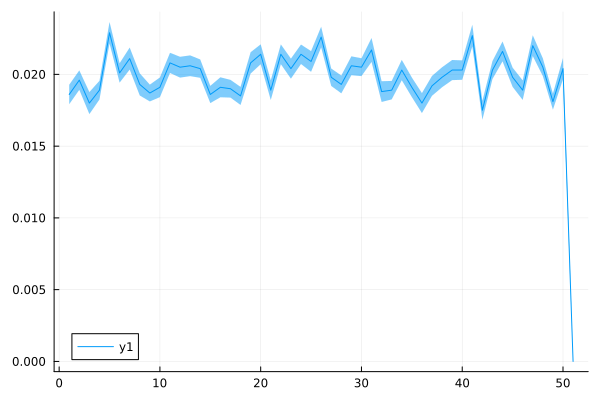

In [9]:
plot()

calculations.sigma = -1
calculations.nPoints = 101
calculations.nBonds = 100
y = calculations.correlationFunctionStatistics(100)

plot!(y[1], ribbon=y[2]/2)
plot!()

## Metropolis

[ Info: Saved animation to /home/dein/spinGlasses/tmp.gif


Plots.AnimatedGif("/home/dein/spinGlasses/tmp.gif")
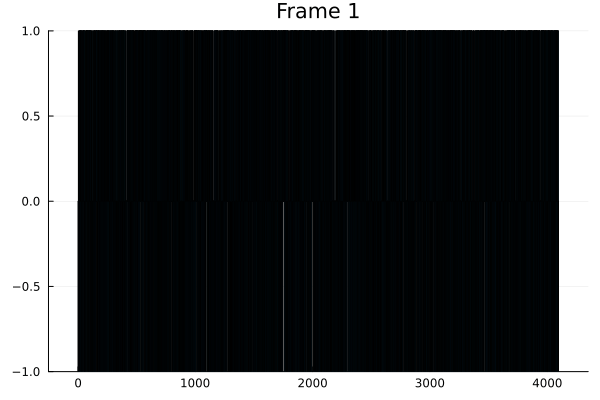

In [35]:
calculations.sigma = 10

spins = [ coinflip() for _ in 1:nPoints ]

connectionsSet = calculations.generateConnectionSet()
connectionsArray = calculations.connectionSetToConnectivityArrayConversion(connectionsSet)
p = plot()

plot!(p, calculations.bigPlotFunction(connectionsSet), sp = 1)

@gif for frame in 1:1000
    bar(p, spins, show=true, legend=false, title="Frame $frame")
    global spins = calculations.metropolis.singleStep(nPoints,0.01, connectionsArray, spins)
end

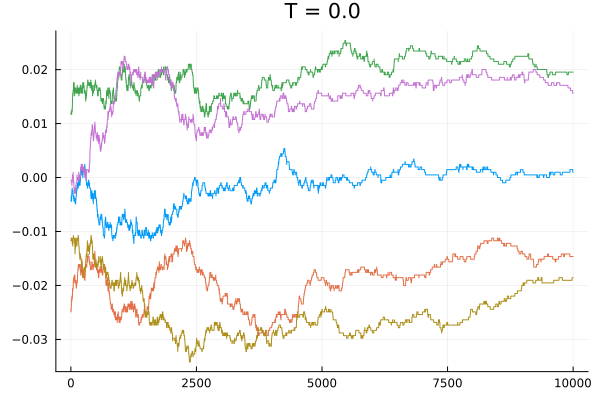

In [36]:
calculations.sigma = 0.1
calculations.nPoints = 4096
calculations.nBonds = 4096

connectionsSet = calculations.generateConnectionSet()
connectionsArray = calculations.connectionSetToConnectivityArrayConversion(connectionsSet)

p = plot()
T = 0.

for _ in 1:5
spins = [ coinflip() for _ in 1:nPoints ]

flips = 1:10000
m = zeros( length(flips))
for flip in flips
    spins = calculations.metropolis.singleStep(nPoints,T, connectionsArray, spins)
    m[flip] = sum(spins)/nPoints
end
    
plot!(p, m,   title="T = $(T)", legend=false)
end

#plot!(p, calculations.bigPlotFunction(connectionsSet))
plot!()